<!-- Ans 1: -->
For multiplying an n x k matrix with a k x m matrix, the resultant matrix n x m needs k multiplications. 
Multiplications: n * m * k
And just one less addition, i.e., (k-1) as:
Additions: n * m * (k - 1)

In [7]:
# Answer 2:
import random
import timeit
import numpy as np

def matrmul_list(A, B):
    n = len(A)
    k = len(A[0])
    m = len(B[0])
    result = [[0] * m for _ in range(n)]
    for i in range(n):
        for j in range(m):
            for l in range(k):
                result[i][j]+=A[i][l]*B[l][j]
    return result

def matrmul_numpy(A, B):
    return np.dot(A, B)

n, k, m = 200, 300, 150
A_list = [[random.random() for _ in range(k)] for _ in range(n)]
B_list = [[random.random() for _ in range(m)] for _ in range(k)]

A_np = np.array(A_list)
B_np = np.array(B_list)

list_time = timeit.timeit(lambda: matrmul_list(A_list, B_list), number=3)
numpy_time = timeit.timeit(lambda: matrmul_numpy(A_np, B_np), number=3)

print(f"List of Lists time: {list_time:.5f} seconds")
print(f"NumPy time: {numpy_time:.5f} seconds")

if numpy_time < list_time:
    print("NumPy is faster because it uses optimized C.")

List of Lists time: 3.47410 seconds
NumPy time: 0.02480 seconds
NumPy is faster because it uses optimized C.


In [8]:
# Answer 3:
import random, timeit
import numpy as np

def median_normal(lst):
    l1 = lst.copy()
    for _ in range(len(l1)//2):
        max_val=max(l1)
        l1.remove(max_val)
    if len(l1) % 2 == 1:
        return max(l1)
    else:
        first = max(l1)
        l1.remove(first)
        second = max(l1)
        return (first+second)/2
    

def median_sort(lst):
    l1=sorted(lst)
    n=len(l1)
    if n%2 == 1:
        return l1[n//2]
    else:
        return (lst[(n//2) +1] + lst[(n//2)])/2

def median_np(lst):
    return np.median(lst)

n=2500

main_list = [random.random() for i in range(n)]

t_normal = timeit.timeit(lambda: median_normal(main_list),number=1)
t_sort = timeit.timeit(lambda: median_sort(main_list),number=100)
t_np = timeit.timeit(lambda: median_np(main_list),number=100)

print(f"Usual method (1 run):{t_normal:.6f} sec")
print(f"Sorting method (100 runs):{t_sort:.6f} sec")
print(f"NumPy median (100 runs):{t_np:.6f} sec")

Usual method (1 run):0.069400 sec
Sorting method (100 runs):0.015200 sec
NumPy median (100 runs):0.011900 sec


Answer 4:
The gradient of the function 

$$f(x, y) = x^2y + y^3 \sin(x) $$

is given by:

$$
\nabla f(x, y) =
\left(
\frac{\partial f}{\partial x},
\frac{\partial f}{\partial y}
\right)
=
\left(
2xy + y^3 \cos(x), \;
x^2 + 3y^2 \sin(x)
\right)
$$

In [1]:
# Answer 5
import jax
import jax.numpy as jn

def f(vr):
    x, y = vr
    return x**2 * y + y**3 *jn.sin(x)

pt = jn.array([3.0,6.0])

grad_f_jax=jax.grad(f)

grad_pt = grad_f_jax(pt)

analytical_grad = jn.array([
    2*pt[0]*pt[1] + pt[1]**3 * jn.cos(pt[0]), pt[0]**2 + 3*pt[1]**2 * jn.sin(pt[0])
])

print("Manual gradient: ", analytical_grad)
print("JAX gradient: ", grad_pt)
print("Same result" if jn.allclose(analytical_grad, grad_pt) else "NO")

Manual gradient:  [-177.83838   24.24096]
JAX gradient:  [-177.83838   24.24096]
Same result


In [9]:
# Answer 6
import sympy as sp

x,y=sp.symbols('x y')

f=x**2*y + y**3* sp.sin(x)

df_dx=sp.diff(f,x)
df_dy=sp.diff(f,y)
grad_vect=sp.Matrix([df_dx, df_dy])

pt={x:3.0,y:6.0}
grad_pt=grad_vect.subs(pt).evalf(5)
print(grad_pt)

# print(f"function f(x, y): {f}\n")
# print(f"df/dx (partial wrt x)={df_dx}\n")
# print(f"df/dy (partial wrt y)={df_dy}\n")
# print(f"Gradient f={grad_vect}")

Matrix([[-177.84], [24.241]])


In [ ]:
# Answer 7
students_data={
    2022:{
        "Mechanical":[
            {"Roll":325,"Name":"Aman Verma","Marks":{"Maths":82,"English":74,"Physics":79}},
            {"Roll":265,"Name":"Sanya Kapoor","Marks":{"Maths":91,"English":88,"Physics":85}}
        ],
        "Computer Science":[
            {"Roll":485,"Name":"Rohit Sharma","Marks":{"Maths":78,"English":81,"Physics":69}},
            {"Roll":658,"Name":"Megha Jain","Marks":{"Maths":95,"English":89,"Physics":93}}
        ]
    },
    2023:{
        "Mechanical":[
            {"Roll":159,"Name":"Kunal Singh","Marks":{"Maths":80,"English":76,"Physics":73}},
            {"Roll":198,"Name":"Ritika Singh","Marks":{"Maths":88,"English":84,"Physics":91}}
        ],
        "Computer Science":[
            {"Roll":203,"Name":"Aniket Roy","Marks":{"Maths":92,"English":86,"Physics":87}},
            {"Roll":254,"Name":"Priya Sethi","Marks":{"Maths":77,"English":83,"Physics":79}}
        ]
    }
}

In [1]:
# Answer 8:

class DataBase:
    class Year:
        class Branch:
            class Student:
                def __init__(self,name,roll_no,marks):
                    self.name=name
                    self.roll_no=roll_no
                    self.marks=marks
                def __repr__(self):
                    return f"Student({self.name},{self.roll_no},{self.marks})"
            def __init__(self,name):
                self.name=name
                self.student=[]
        def __init__(self,year):
            self.year=year
            self.branch=[]
    def __init__(self):
        self.years=[]

db=DataBase()
year=DataBase.Year(2025)
branch=DataBase.Year.Branch("CS")
branch.student.append(DataBase.Year.Branch.Student("Anjali Singh",101,{"Maths":90,"Physics":85,"Chemistry":88}))
branch.student.append(DataBase.Year.Branch.Student("Rahul Sharma",102,{"Maths":78,"Physics":80,"Chemistry":75}))
year.branch.append(branch)
db.years.append(year)

print(db.years[0].year)
print(db.years[0].branch[0].name)
print(db.years[0].branch[0].student[0])

2025
CS
Student(Anjali Singh,101,{'Maths': 90, 'Physics': 85, 'Chemistry': 88})


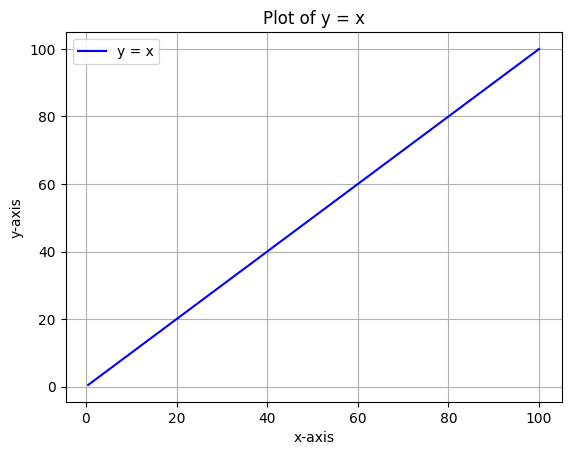

In [25]:
# Answer 9

import numpy as np
import matplotlib.pyplot as plt

x=np.arange(0.5,100.5,0.5)
y=x
plt.plot(x, y, label='y = x',color='b')
plt.title("Plot of y = x")
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.legend()
plt.grid(True)

plt.savefig("plot1.png")

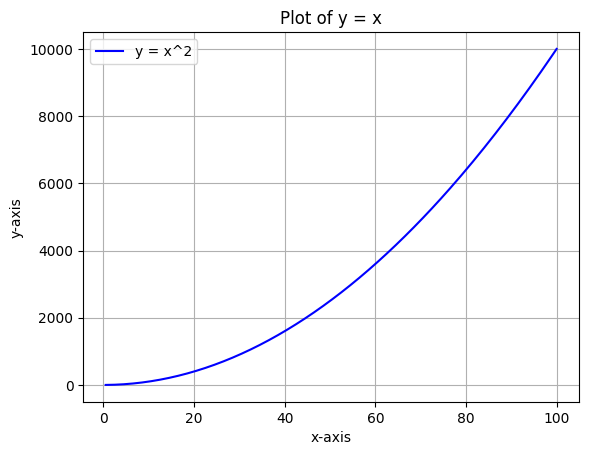

In [27]:
# Answer 9

import numpy as np
import matplotlib.pyplot as plt

x=np.arange(0.5,100.5,0.5)
y=x**2
plt.plot(x, y, label='y = x^2',color='b')
plt.title("Plot of y = x")
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.legend()
plt.grid(True)

plt.savefig("plot1.png")

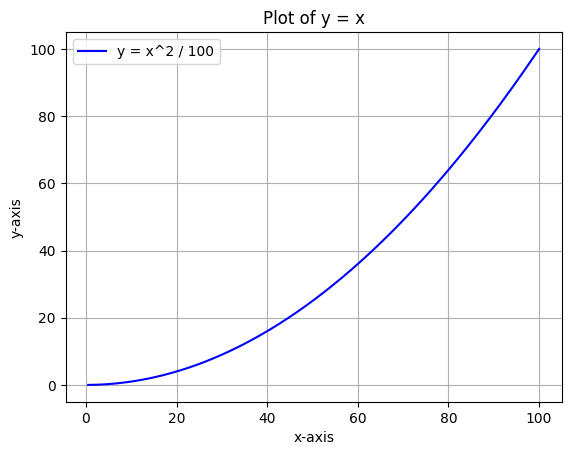

In [28]:
# Answer 9

import numpy as np
import matplotlib.pyplot as plt

x=np.arange(0.5,100.5,0.5)
y=x**2/100
plt.plot(x, y, label='y = x^2 / 100',color='b')
plt.title("Plot of y = x")
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.legend()
plt.grid(True)

plt.savefig("plot1.png")

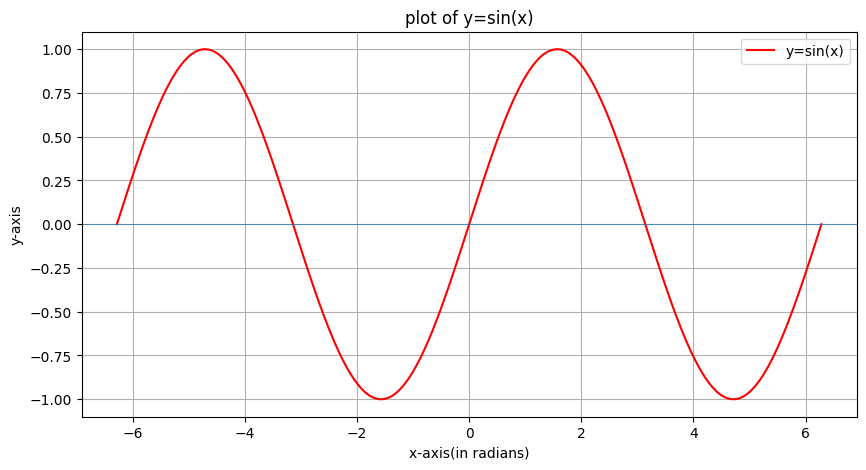

In [38]:
# Answer 9

import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-2*np.pi,2*np.pi,400)
y = np.sin(x)
plt.figure(figsize=(10,5))
plt.plot(x, y, label='y=sin(x)', color='red')

plt.title("plot of y=sin(x)")
plt.xlabel("x-axis(in radians)")
plt.ylabel("y-axis")
plt.grid(True)
plt.axhline(0,linewidth=0.5)
plt.legend()
plt.savefig("sinx_graph.png")

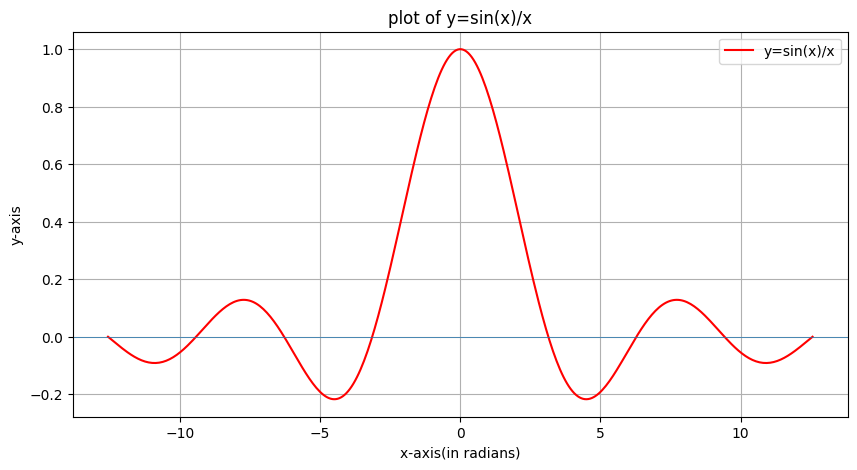

In [45]:
# Answer 9

import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-4*np.pi,4*np.pi,400)
y = np.sin(x)/x
plt.figure(figsize=(10,5))
plt.plot(x, y, label='y=sin(x)/x', color='red')

plt.title("plot of y=sin(x)/x")
plt.xlabel("x-axis(in radians)")
plt.ylabel("y-axis")
plt.grid(True)
plt.axhline(0,linewidth=0.5)
plt.legend()
plt.savefig("sinxdivx_graph.png")

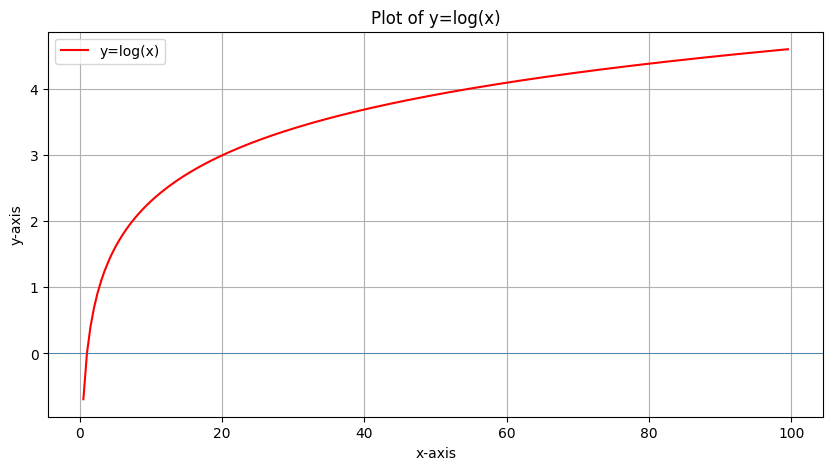

In [49]:
# Answer 9

import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0.5,100,0.5)
y = np.log(x)
plt.figure(figsize=(10,5))
plt.plot(x,y,label='y=log(x)',color='red')

plt.title("Plot of y=log(x)")
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.grid(True)
plt.axhline(0,linewidth=0.5)
plt.legend()
plt.savefig("logx_graph.png")

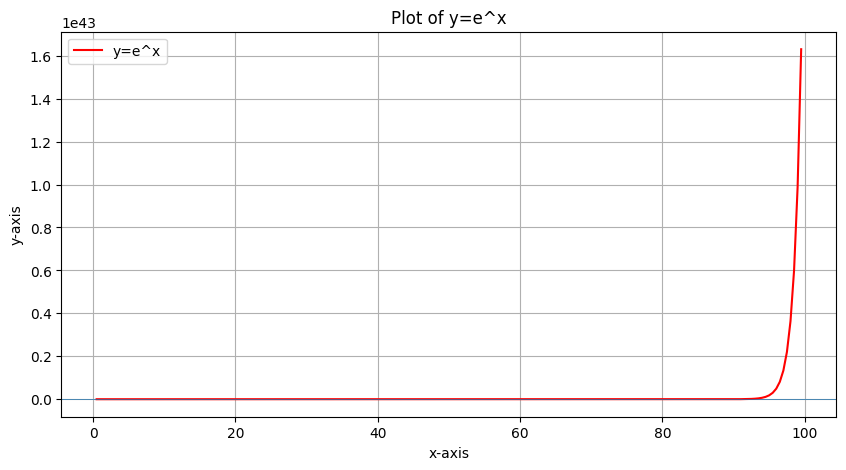

In [51]:
# Answer 9

import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0.5,100,0.5)
y = np.exp(x)
plt.figure(figsize=(10,5))
plt.plot(x,y,label='y=e^x',color='red')

plt.title("Plot of y=e^x")
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.grid(True)
plt.axhline(0,linewidth=0.5)
plt.legend()
plt.savefig("e^x_graph.png")

In [93]:
# Answer 10
import numpy as np
x=np.random.rand(20,5)
x+=1
import pandas as pd
df=pd.DataFrame(x,columns=['a','b','c','d','e'])
# std_devs=[]
# for i in ('a','b','c','d','e'):
#     std_devs.append(np.std(df[i]))
# means=[]
# for i in ('a','b','c','d','e'):
#     means.append(np.mean(df[i]))
# print("The column with max standard deviation is: ", std_devs.index(max(std_devs)) +1)
# print("The column with min mean is: ", means.index(min(means)) +1)
col_with_max_std = df.std().idxmax()
col_with_min_mean = df.mean().idxmin()
print("The column with max standard deviation is: ", col_with_max_std)
print("The column with min mean is: ", col_with_min_mean)

The column with max standard deviation is:  d
The column with min mean is:  e


In [ ]:
# Answer 11
import numpy as np
import pandas as pd

x=np.random.rand(20,5)
x+=1
df=pd.DataFrame(x,columns=['a','b','c','d','e'])

df["f"]=df[["a","b","c","d","e"]].sum(axis=1)
df["g"]=np.where(df["f"]>8,"GT8","LT8")
df["h"]=df[["a","b","c","d","e","f"]].std(axis=1)
print(df)

           a         b         c         d         e         f    g         h
0   1.039185  1.278138  1.404480  1.688189  1.856541  7.266534  LT8  2.390969
1   1.391154  1.437841  1.418233  1.135970  1.025514  6.408711  LT8  2.099843
2   1.699584  1.367580  1.453316  1.603992  1.783318  7.907791  LT8  2.587214
3   1.902583  1.923347  1.451487  1.385618  1.787139  8.450173  GT8  2.769170
4   1.652913  1.190234  1.816535  1.070229  1.103800  6.833710  LT8  2.252948
5   1.785381  1.441736  1.463424  1.547350  1.352792  7.590683  LT8  2.483477
6   1.233201  1.927013  1.282747  1.588458  1.823375  7.854793  LT8  2.580442
7   1.851626  1.019531  1.413127  1.108250  1.287698  6.680230  LT8  2.201201
8   1.932245  1.495132  1.350041  1.122524  1.959341  7.859282  LT8  2.587667
9   1.587126  1.253273  1.572663  1.927928  1.418700  7.759689  LT8  2.544149
10  1.102729  1.105674  1.336087  1.378427  1.836403  6.759321  LT8  2.223761
11  1.178342  1.115152  1.066976  1.787493  1.450622  6.598584  

In [54]:
# Answer 12

import numpy as np

a = np.array([1, 2, 3])
b = np.array([[10],[20],[30]])
final=a+b
print(a.shape)
print(b.shape)
print(final.shape)
print(final)

(3,)
(3, 1)
(3, 3)
[[11 12 13]
 [21 22 23]
 [31 32 33]]


In [ ]:
# Answer 13
import numpy as np

def argmin_manual(arr):
    min_index=0
    for i in range(1,len(arr)):
        if arr[i]<arr[min_index]:
            min_index = i
    return min_index

x=np.array([-1,4,2,1,7,-6,7])
print("Manual argmin:",argmin_manual(x))
print("NumPy argmin:",np.argmin(x))


Manual argmin: 5
NumPy argmin: 5
